In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
x = np.array([ 0.0, 1.11111111, 2.22222222, 3.33333333, 4.44444444, 5.55555556, 6.66666667, 7.77777778, 8.88888889, 10.0])
y = np.array([2.04907913, 2.01790925, 2.09382458, 2.06008643, 2.42624547,3.44567705, 3.92073775, 3.88130661, 4.10408773, 4.08783826])

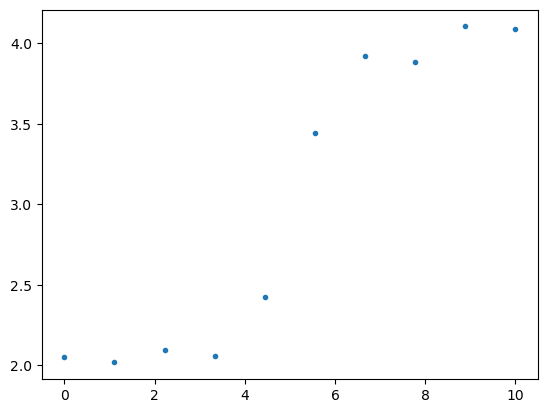

In [3]:
plt.plot(x,y,'.')

In [4]:
with  pm.Model() as model:
    w = pm.Normal('w', 0, 20, shape=4)
    sigma = pm.HalfCauchy('sigma', 0.5)
    mu = pm.Deterministic('mu', w[3]+w[2]/(1+pm.math.exp(-w[0]+w[1]*x)))
    pm.Normal('y-lik', mu=mu, sigma=sigma, observed=y)
    inference = pm.ADVI()
    approx = pm.fit(n=1000, method=inference)

Finished [100%]: Average Loss = 415.3


In [5]:
with model:
    sample = approx.sample(1000)
    ppc = pm.sample_posterior_predictive(sample)

In [14]:
with model:
    trace = pm.sample(4000,tune=2000)

C:\Users\Mfund\AppData\Local\Temp\ipykernel_21792\1851441120.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(4000,tune=2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, w]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 57 seconds.
There were 610 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5233173694156187, but should be close to 0.8. Try to increase the number of tuning steps.
There were 216 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.42034256688821825, but should be close to 0.8. Try to increase the number of tuning steps.
There were 372 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7117873453478105, but should be close to 0.8. Try to increase the number of tuning steps.
There were 540 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5867901678351094, but should be clos

C:\Users\Mfund\anaconda3\envs\pymc3_env\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


<AxesSubplot: >

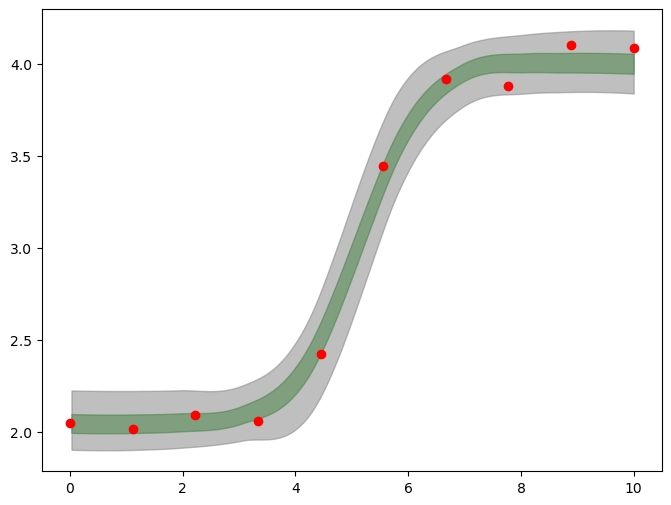

In [15]:
_,p = plt.subplots(figsize=(8,6))
p.plot(x,y,'ro')
az.plot_hdi(x, trace['mu'], color='g', hdi_prob=.6)
az.plot_hdi(x, trace['mu'], color='gray', hdi_prob=.98)

C:\Users\Mfund\anaconda3\envs\pymc3_env\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


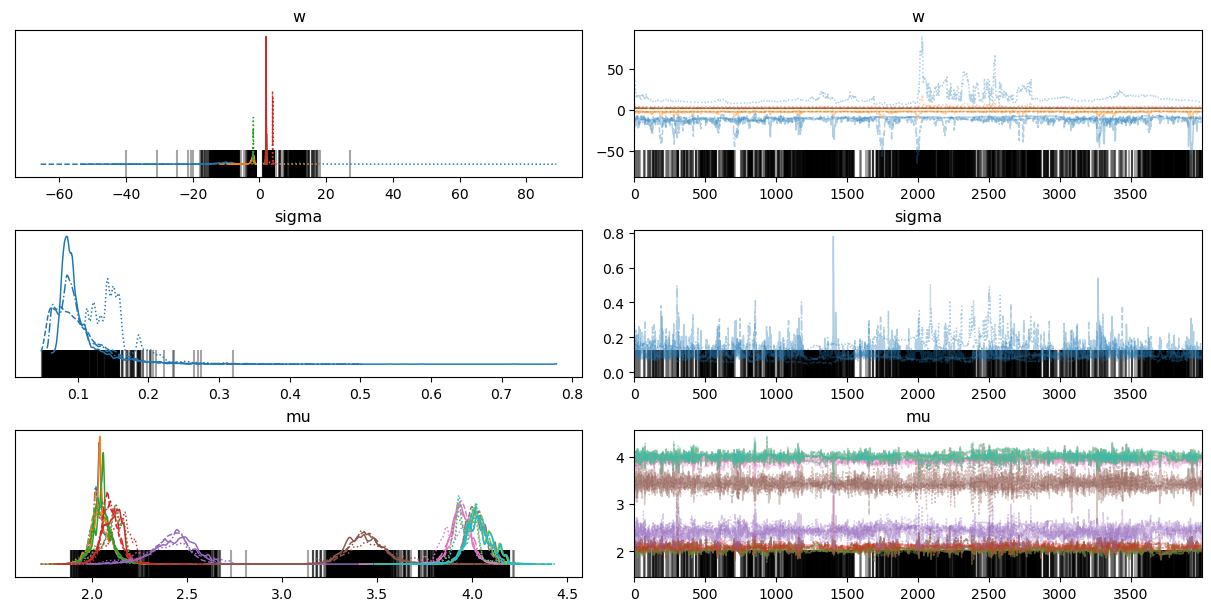

In [16]:
az.plot_trace(trace);

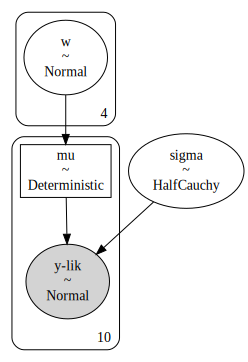

In [20]:
pm.model_to_graphviz(model)

In [36]:
with model:
    idata = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, w]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
There were 604 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8869978473367376, but should be close to 0.8. Try to increase the number of tuning steps.
There were 219 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5754891130491171, but should be close to 0.8. Try to increase the number of tuning steps.
There were 31 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [37]:
with model:
    pm.sample_posterior_predictive(idata)